<a href="https://colab.research.google.com/github/KubraErensoy/HeartDiseaseClassification/blob/main/Clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from pandas import Series, DataFrame
import plotly.express as px

# The Attributess include:
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

In [ ]:
df = pd.read_excel("heart.xlsx", index_col=0)

In [ ]:
len(df)

918

In [ ]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Index,,,,,,,,,,,,
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Index,,,,,,,,,,,,
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 93.2+ KB


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
# Cholesterol değeri "0" olan gözlem sayısı
df.loc[df.Cholesterol == 0].Cholesterol.value_counts()

0    172
Name: Cholesterol, dtype: int64

In [ ]:
# 0 değerlerinin null olarak değiştirelim
df.loc[df['Cholesterol'] == 0, "Cholesterol"] = np.nan

In [ ]:
df.Cholesterol.isna().sum()

172

In [ ]:
data = [df]
for dataset in data:
    mean = df["Cholesterol"].mean()
    std = df["Cholesterol"].std()
    is_null = dataset["Cholesterol"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_chol = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Cholesterol column with random values generated
    chol_slice = dataset["Cholesterol"].copy()
    chol_slice[np.isnan(chol_slice)] = rand_chol
    dataset["Cholesterol"] = chol_slice
    dataset["Cholesterol"] = df["Age"].astype(int)

In [ ]:
# RestingBP değeri "0" olan gözlem sayısı
df.loc[df.RestingBP == 0].RestingBP.value_counts()

0    1
Name: RestingBP, dtype: int64

In [ ]:
# Sadece 1 değer "0" a eşit olduğu için ortalamaya eşitlenebilir
df.loc[df.RestingBP == 0, "RestingBP"] = df.RestingBP.mean()

In [ ]:
#cinsiyet dağılımı 
sex_dist = df.groupby("Sex").count().reset_index()
sex_dist

,Sex,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,F,193,193,193,193,193,193,193,193,193,193,193
1,M,725,725,725,725,725,725,725,725,725,725,725


Text(0.5, 1.0, 'Distribution of Sex')

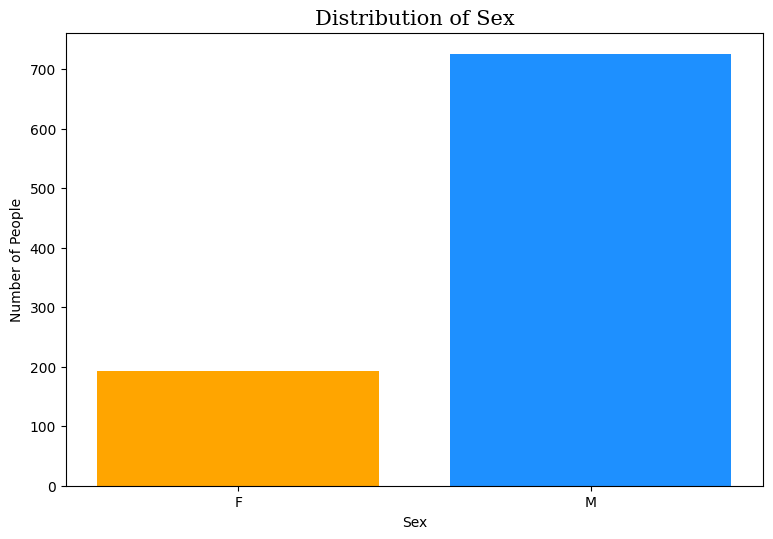

In [ ]:
#cinsiyet dağılımı grafiği
plt.figure(figsize=(9,6),dpi=100)
plt.bar(sex_dist.Sex, sex_dist.Age, color=['orange','dodgerblue']);
plt.xlabel("Sex")
plt.ylabel("Number of People")
plt.title("Distribution of Sex", family='serif',fontsize = 15,loc='center',color='black')

Text(0.5, 1.0, 'Distribution of Age')

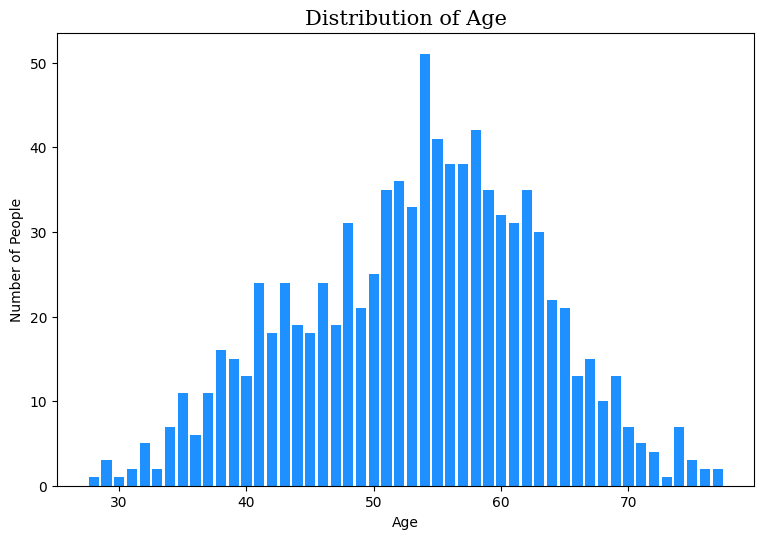

In [ ]:
#yaş dağılımı
age_dist = df.groupby("Age").count().reset_index()
age_dist
#yaş dağılımı grafiği
plt.figure(figsize=(9,6),dpi=100)
plt.bar(age_dist.Age, age_dist.Sex, color='dodgerblue');
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.title("Distribution of Age", family='serif',fontsize = 15,loc='center',color='black')

In [ ]:
#yaşlar sınıflandırılacak
data = [df]
for dataset in data:
    dataset.loc[(df['Age'] > 20) & (df['Age'] <= 30), 'Age'] = 2
    dataset.loc[(df['Age'] > 30) & (df['Age'] <= 40), 'Age'] = 3
    dataset.loc[(df['Age'] > 40) & (df['Age'] <= 50), 'Age'] = 4
    dataset.loc[(df['Age'] > 50) & (df['Age'] <= 60), 'Age'] = 5
    dataset.loc[(df['Age'] > 60) & (df['Age'] <= 70), 'Age'] = 6
    dataset.loc[df['Age'] > 70, 'Age'] = 7

In [ ]:
df["Age"].value_counts()

5    381
4    223
6    197
3     88
7     24
2      5
Name: Age, dtype: int64

Text(0.5, 1.0, 'Distribution of Age Group')

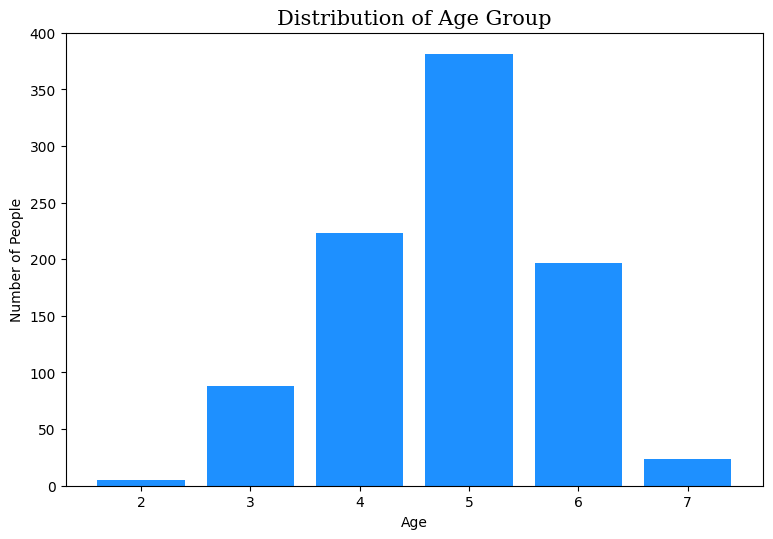

In [ ]:
#yaş dağılımı grafiği
age_group_dist = df.groupby("Age").count().reset_index()
plt.figure(figsize=(9,6),dpi=100)
plt.bar(age_group_dist.Age, age_group_dist.Sex, color='dodgerblue');
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.title("Distribution of Age Group", family='serif',fontsize = 15,loc='center',color='black')

Text(0.5, 1.0, 'Distribution of ChestPainType')

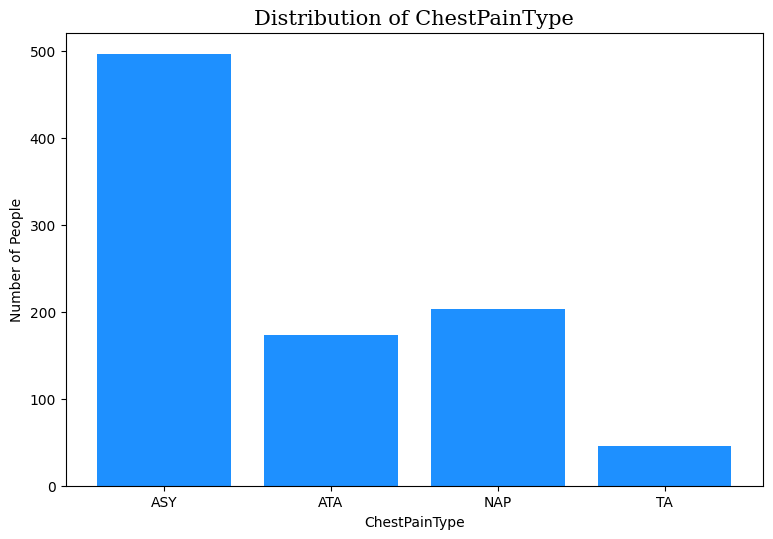

In [ ]:
#göğüs ağrısı dağılımı
pain_dist = df.groupby("ChestPainType").count().reset_index()
pain_dist
#göğüs ağrısı dağılımı grafiği
plt.figure(figsize=(9,6),dpi=100)
plt.bar(pain_dist.ChestPainType, pain_dist.Sex, color='dodgerblue');
plt.xlabel("ChestPainType")
plt.ylabel("Number of People")
plt.title("Distribution of ChestPainType", family='serif',fontsize = 15,loc='center',color='black')

Text(0.5, 1.0, 'Distribution of RestingBP')

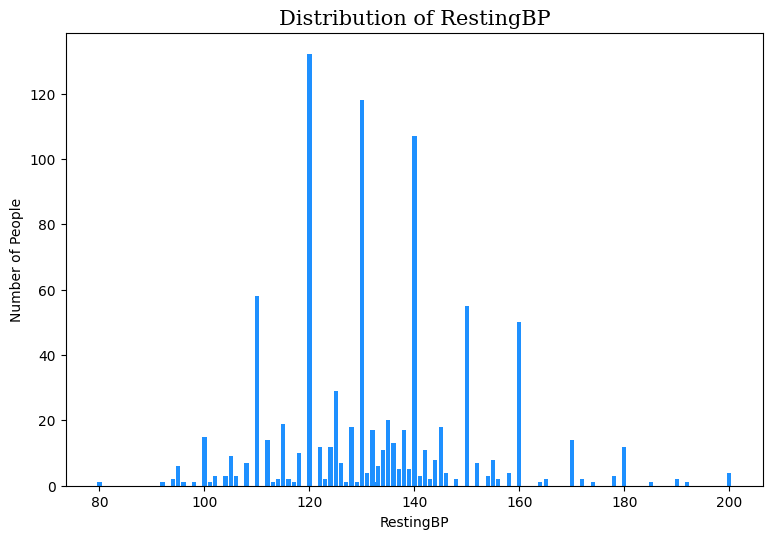

In [ ]:
#dist of resting bp
rest_dist = df.groupby("RestingBP").count().reset_index()
rest_dist
#dist of resting bp grafiği
plt.figure(figsize=(9,6),dpi=100)
plt.bar(rest_dist.RestingBP, rest_dist.Sex, color='dodgerblue');
plt.xlabel("RestingBP")
plt.ylabel("Number of People")
plt.title("Distribution of RestingBP", family='serif',fontsize = 15,loc='center',color='black')

Text(0.5, 1.0, 'Distribution of Cholesterol')

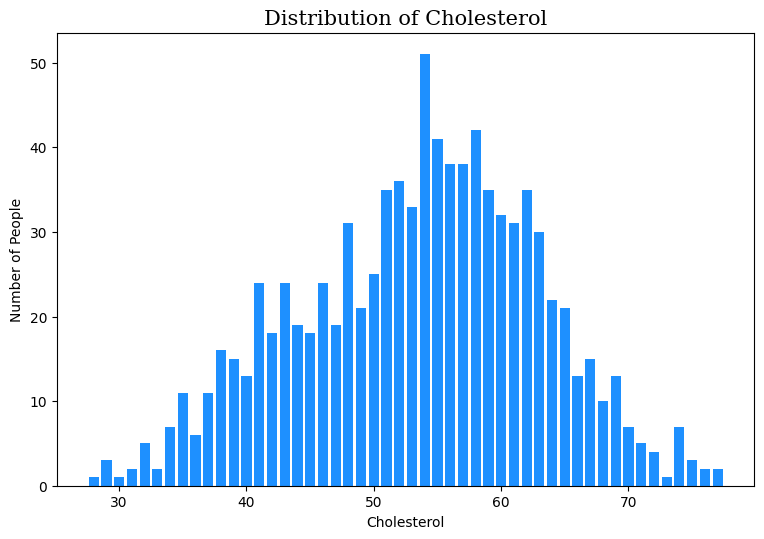

In [ ]:
#dist of Cholesterol
chol_dist = df.groupby("Cholesterol").count().reset_index()
chol_dist
#dist of resting bp grafiği
plt.figure(figsize=(9,6),dpi=100)
plt.bar(chol_dist.Cholesterol, chol_dist.Sex, color='dodgerblue');
plt.xlabel("Cholesterol")
plt.ylabel("Number of People")
plt.title("Distribution of Cholesterol", family='serif',fontsize = 15,loc='center',color='black')

Text(0.5, 1.0, 'Distribution of FastingBS')

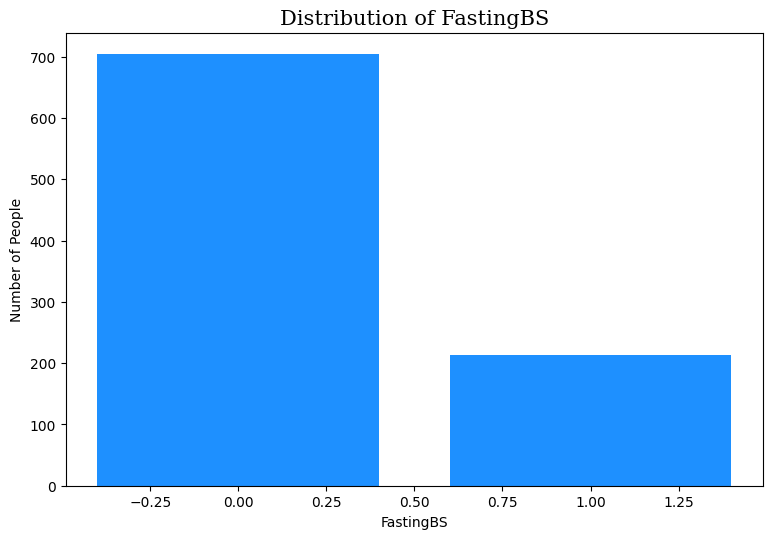

In [ ]:
#dist of FastingBS
fast_dist = df.groupby("FastingBS").count().reset_index()
fast_dist
#dist of resting bp grafiği
plt.figure(figsize=(9,6),dpi=100)
plt.bar(fast_dist.FastingBS, fast_dist.Sex, color='dodgerblue');
plt.xlabel("FastingBS")
plt.ylabel("Number of People")
plt.title("Distribution of FastingBS", family='serif',fontsize = 15,loc='center',color='black')

Text(0.5, 1.0, 'Distribution of RestingECG')

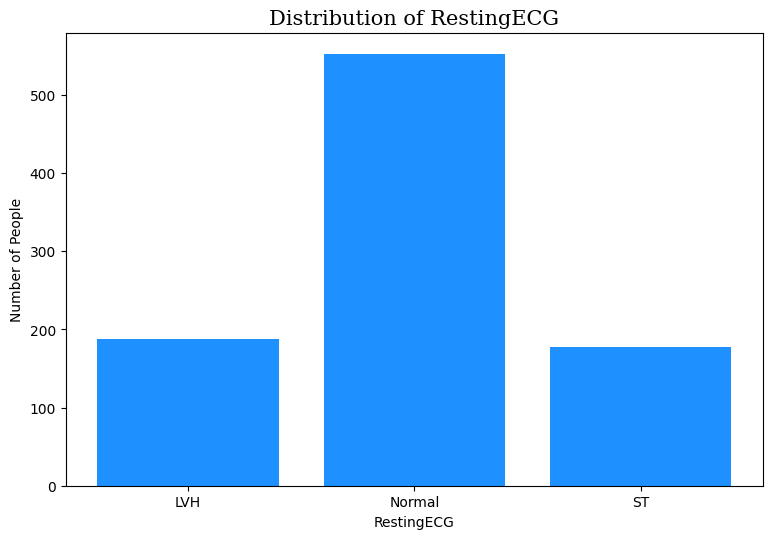

In [ ]:
#dist of RestingECG
restecg_dist = df.groupby("RestingECG").count().reset_index()
restecg_dist
#dist of resting bp grafiği
plt.figure(figsize=(9,6),dpi=100)
plt.bar(restecg_dist.RestingECG, restecg_dist.Sex, color = "dodgerblue");
plt.xlabel("RestingECG")
plt.ylabel("Number of People")
plt.title("Distribution of RestingECG", family='serif',fontsize = 15,loc='center',color='black')

Text(0.5, 1.0, 'Distribution of MaxHR')

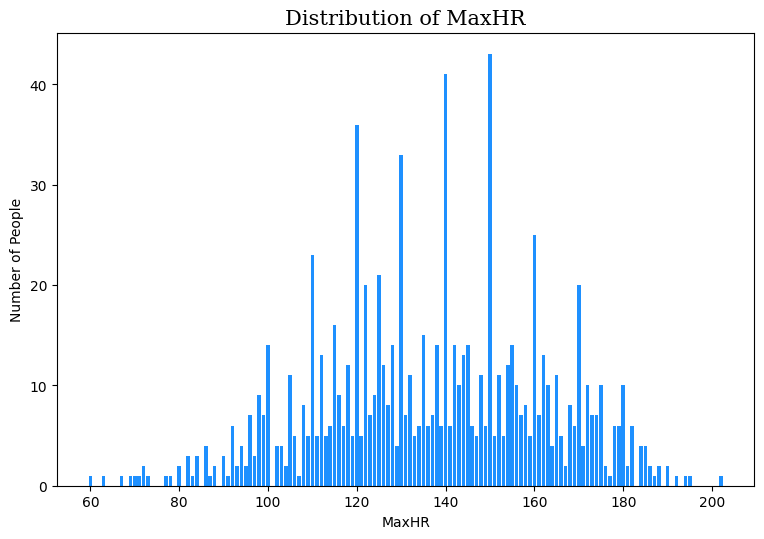

In [ ]:
#dist of MaxHR
restecg_dist = df.groupby("MaxHR").count().reset_index()
restecg_dist
#dist of MaxHR grafiği
plt.figure(figsize=(9,6),dpi=100)
plt.bar(restecg_dist.MaxHR, restecg_dist.Sex, color='dodgerblue');
plt.xlabel("MaxHR")
plt.ylabel("Number of People")
plt.title("Distribution of MaxHR", family='serif',fontsize = 15,loc='center',color='black')

Text(0.5, 1.0, 'Distribution of ExerciseAngina')

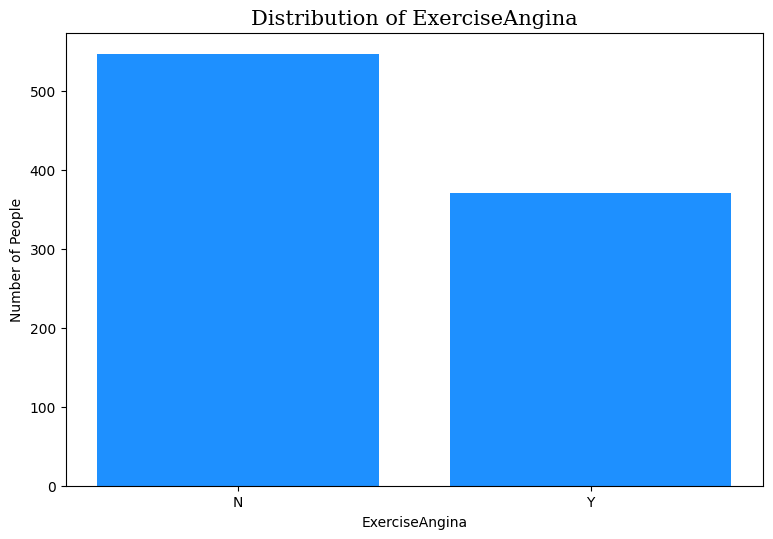

In [ ]:
#dist of ExerciseAngina
exc_dist = df.groupby("ExerciseAngina").count().reset_index()
exc_dist
#dist of ExerciseAngina grafiği
plt.figure(figsize=(9,6),dpi=100)
plt.bar(exc_dist.ExerciseAngina, exc_dist.Sex, color='dodgerblue');
plt.xlabel("ExerciseAngina")
plt.ylabel("Number of People")
plt.title("Distribution of ExerciseAngina", family='serif',fontsize = 15,loc='center',color='black')

Text(0.5, 1.0, 'Distribution of Oldpeak')

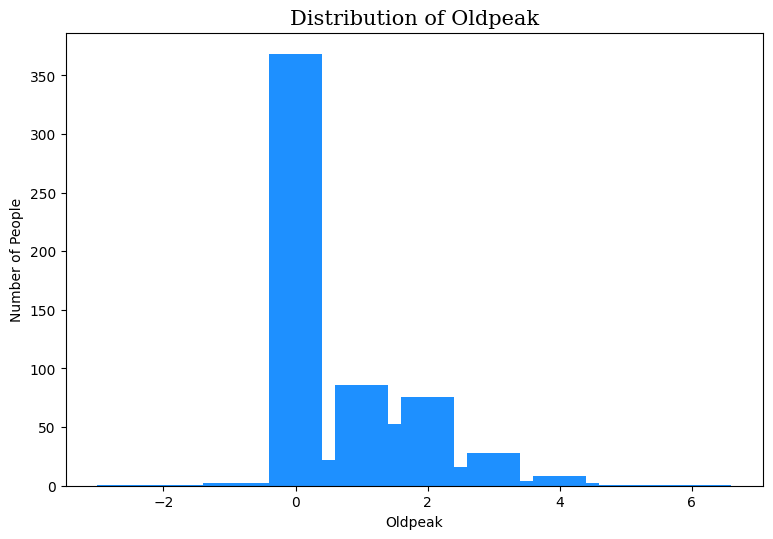

In [ ]:
#dist of Oldpeak
old_dist = df.groupby("Oldpeak").count().reset_index()
old_dist
#dist of Oldpeak grafiği
plt.figure(figsize=(9,6),dpi=100)
plt.bar(old_dist.Oldpeak, old_dist.Sex, color='dodgerblue');
plt.xlabel("Oldpeak")
plt.ylabel("Number of People")
plt.title("Distribution of Oldpeak", family='serif',fontsize = 15,loc='center',color='black')

Text(0.5, 1.0, 'Distribution of ST_Slope')

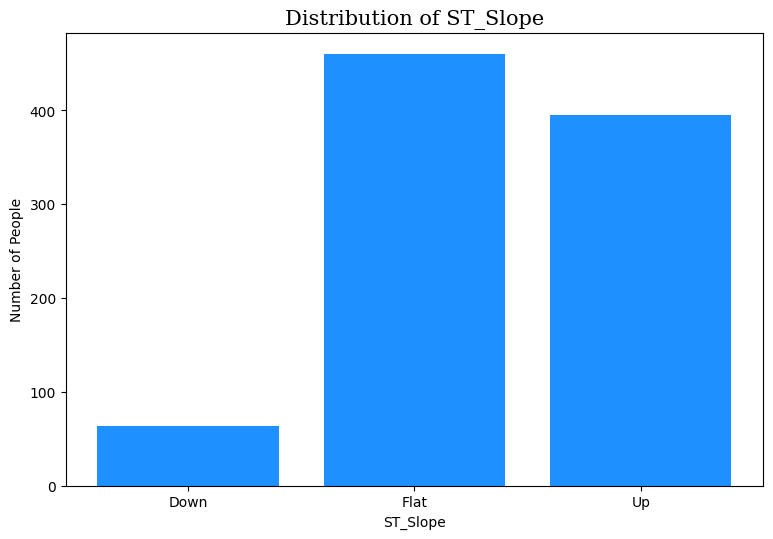

In [ ]:
#dist of ST_Slope
st_dist = df.groupby("ST_Slope").count().reset_index()
st_dist 
#dist of ST_Slope grafiği
plt.figure(figsize=(9,6),dpi=100)
plt.bar(st_dist.ST_Slope, st_dist.Sex, color='dodgerblue');
plt.xlabel("ST_Slope")
plt.ylabel("Number of People")
plt.title("Distribution of ST_Slope", family='serif',fontsize = 15,loc='center',color='black')

Text(0.5, 1.0, 'Distribution of HeartDisease')

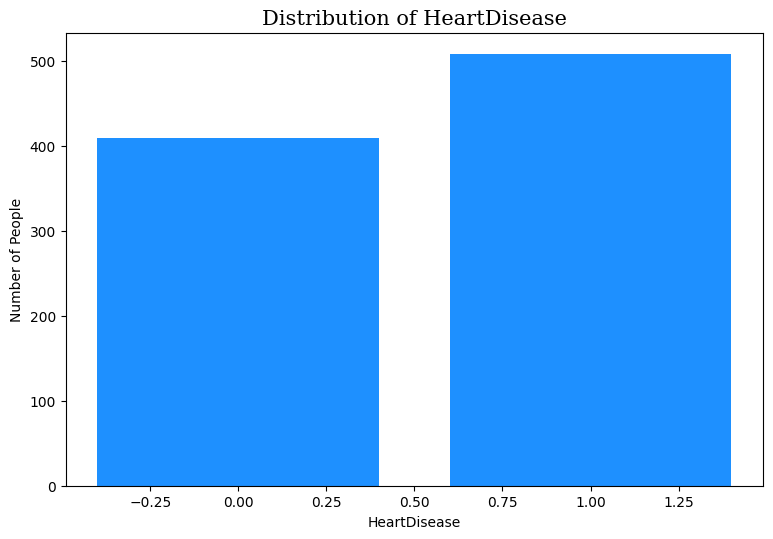

In [ ]:
#dist of HeartDisease
hd_dist = df.groupby("HeartDisease").count().reset_index()
hd_dist
#dist of HeartDisease grafiği
plt.figure(figsize=(9,6),dpi=100)
plt.bar(hd_dist.HeartDisease, hd_dist.Sex, color='dodgerblue');
plt.xlabel("HeartDisease")
plt.ylabel("Number of People")
plt.title("Distribution of HeartDisease", family='serif',fontsize = 15,loc='center',color='black')

In [ ]:
# Shows the Distribution of Heat Diseases with respect to male and female
fig=px.histogram(df, 
                 x="HeartDisease",
                 color="Sex",
                 title="Gender Distribution of Heart Diseases",
                barmode="group",
                color_discrete_sequence=['dodgerblue','orange'])
fig.show()

In [ ]:
fig=px.histogram(df,
                 x="ChestPainType",
                 color="Sex",
                 hover_data=df.columns,
                 title="Types of Chest Pain",
                 color_discrete_sequence=['dodgerblue','orange'])
fig.show()

[]

<Figure size 1080x720 with 0 Axes>

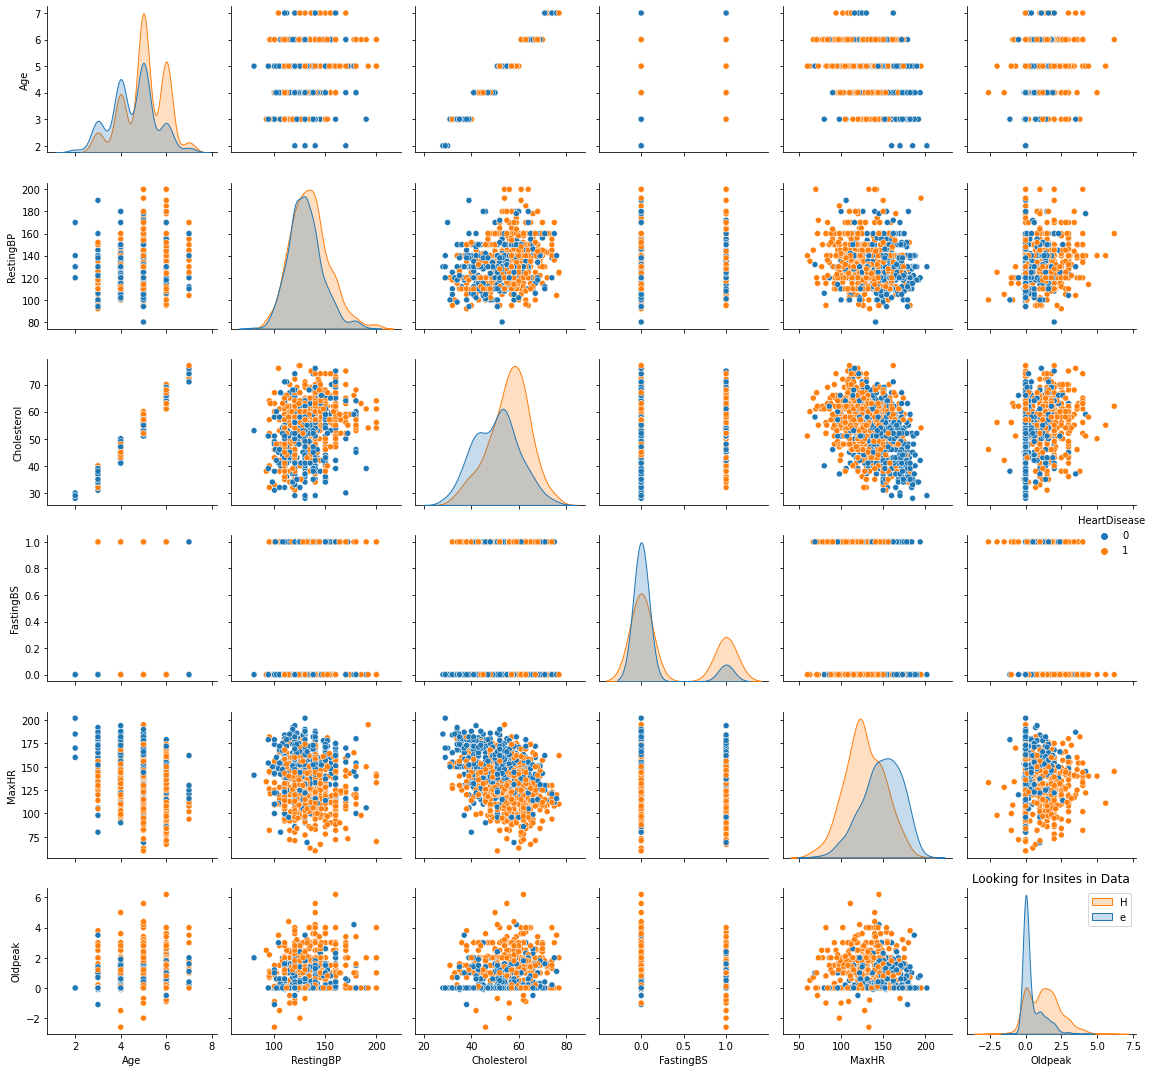

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

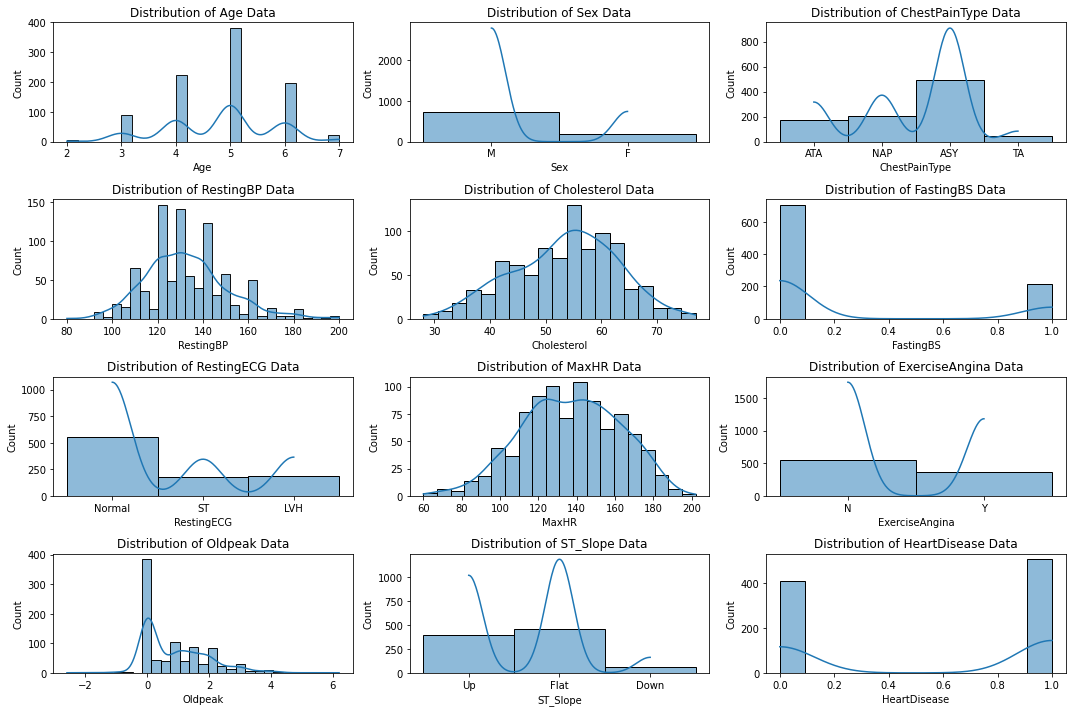

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

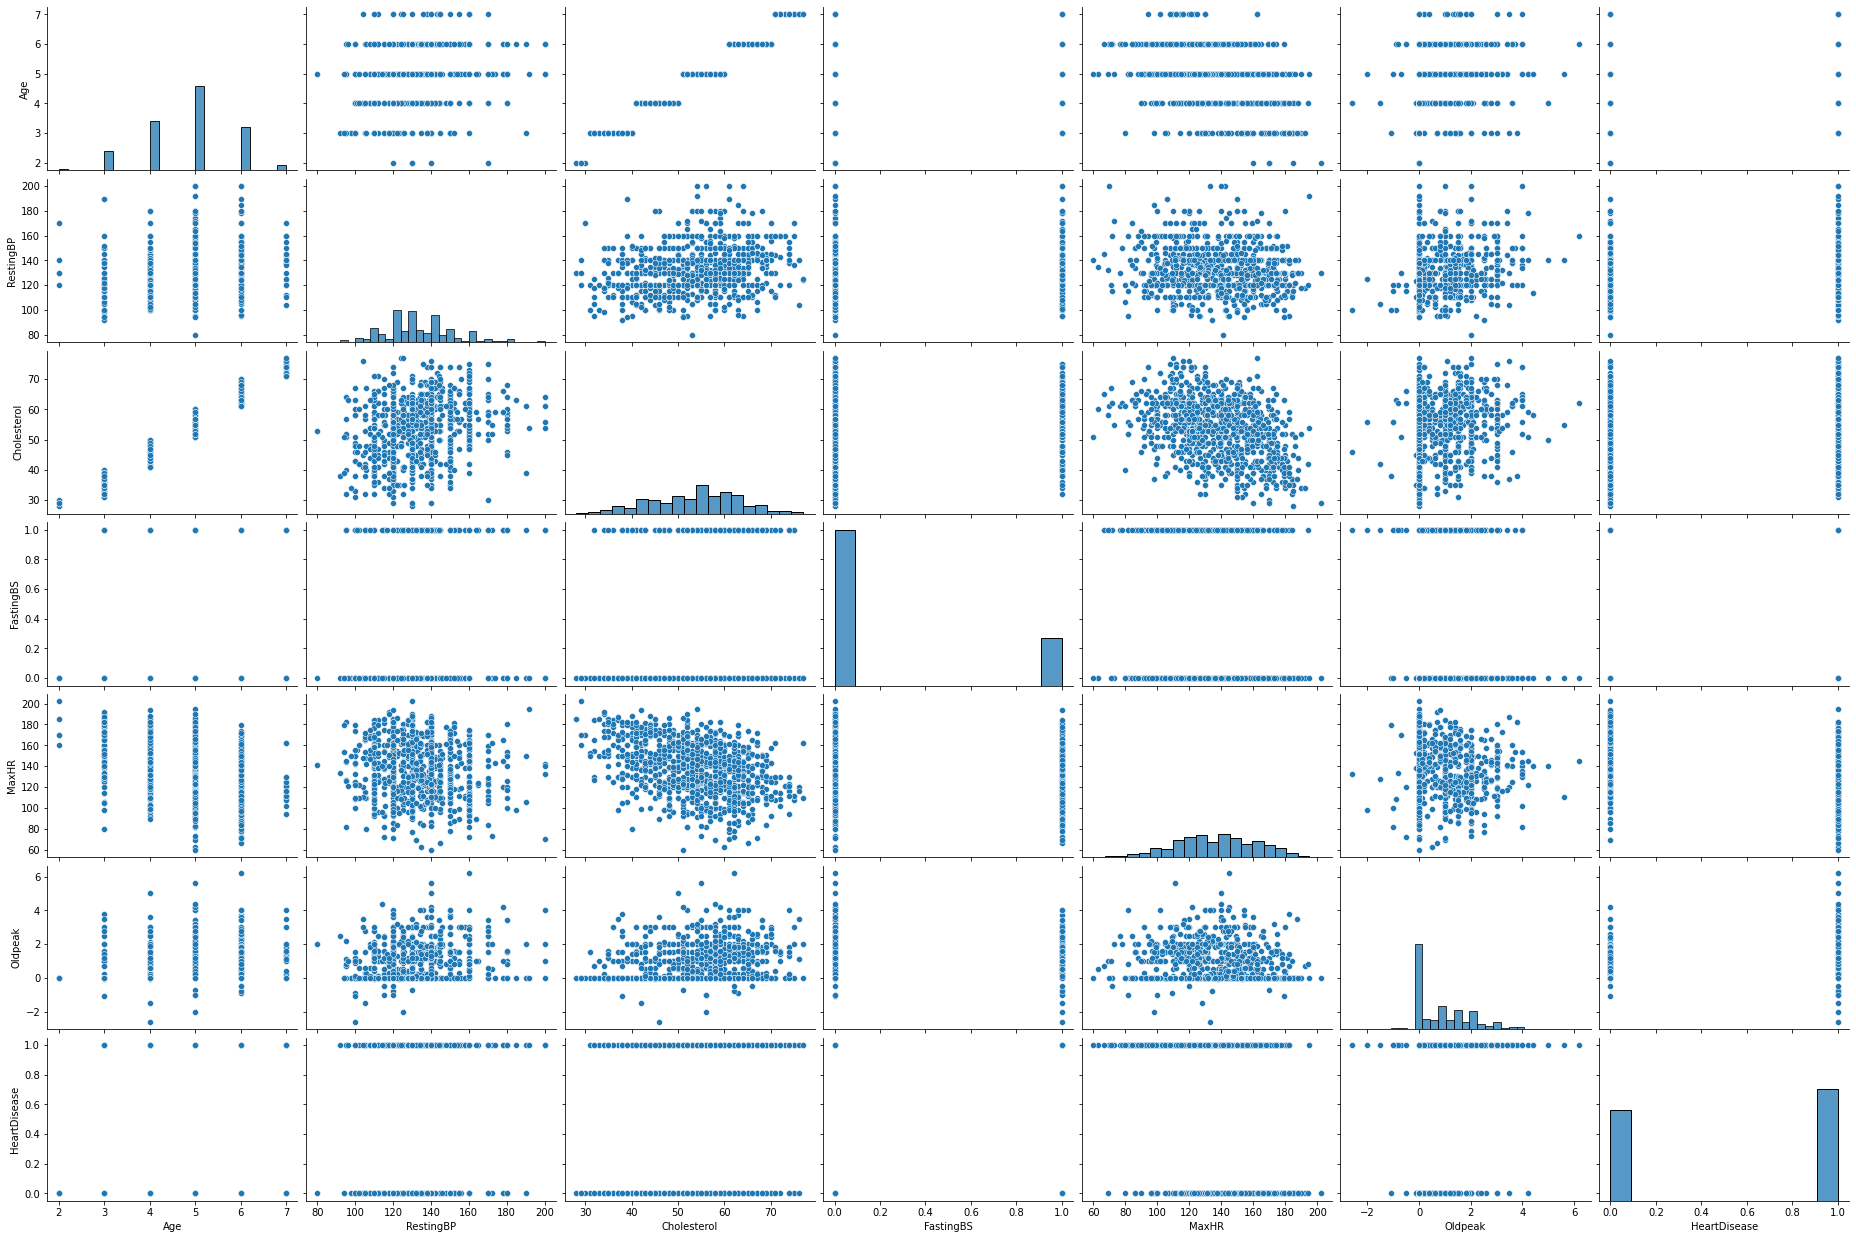

In [ ]:
sns.pairplot(df, aspect=1.5)

In [ ]:
#outliers

In [ ]:
fig = px.box(df,y="Age",x="HeartDisease",title=f"Distrubution of Age")
fig.show()

In [ ]:
fig = px.box(df,y="RestingBP",x="HeartDisease",title=f"Distrubution of RestingBP",color="Sex")
fig.show()

In [ ]:
fig = px.box(df,y="Cholesterol",x="HeartDisease",title=f"Distrubution of Cholesterol")
fig.show()

In [ ]:
fig = px.box(df,y="Oldpeak",x="HeartDisease",title=f"Distrubution of Oldpeak")
fig.show()

In [ ]:
fig = px.box(df,y="MaxHR",x="HeartDisease",title=f"Distrubution of MaxHR")
fig.show()

In [ ]:
df["Sex"].unique()
df['Sex'] = df['Sex'].replace("F",0).replace("M",1)

In [ ]:
df["ChestPainType"].unique()
df['ChestPainType'] = df['ChestPainType'].replace("ATA",0).replace("NAP",1).replace("ASY",2).replace("TA",3)

In [ ]:
df["RestingECG"].unique()
df['RestingECG'] = df['RestingECG'].replace("Normal",0).replace("ST",1).replace("LVH",2)

In [ ]:
df["ExerciseAngina"].unique()
df['ExerciseAngina'] = df['ExerciseAngina'].replace("Y",1).replace("N",0)

In [ ]:
df["ST_Slope"].unique()
df['ST_Slope'] = df['ST_Slope'].replace("Down",0).replace("Flat",1).replace("Up",2)

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Index,,,,,,,,,,,,
0,3,1,0,140.0,40,0,0,172,0,0.0,2,0
1,4,0,1,160.0,49,0,0,156,0,1.0,1,1
2,3,1,0,130.0,37,0,1,98,0,0.0,2,0
3,4,0,2,138.0,48,0,0,108,1,1.5,1,1
4,5,1,1,150.0,54,0,0,122,0,0.0,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 125.5 KB


In [ ]:
df.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.034011,0.195032,0.235778,0.956834,0.192929,0.198665,-0.376935,0.204512,0.247686,-0.254402,0.253785
Sex,0.034011,1.000000,0.179766,0.009421,0.055750,0.120076,-0.018343,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,0.195032,0.179766,1.000000,0.073268,0.214164,0.155111,0.112067,-0.273076,0.324049,0.300846,-0.352364,0.459017
RestingBP,0.235778,0.009421,0.073268,1.000000,0.263079,0.067816,0.094498,-0.109669,0.153015,0.174215,-0.082134,0.117930
Cholesterol,0.956834,0.055750,0.214164,0.263079,1.000000,0.198039,0.213152,-0.382045,0.215793,0.258612,-0.268264,0.282039
FastingBS,0.192929,0.120076,0.155111,0.067816,0.198039,1.000000,0.050707,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,0.198665,-0.018343,0.112067,0.094498,0.213152,0.050707,1.000000,0.048552,0.036119,0.114428,-0.078807,0.061011
MaxHR,-0.376935,-0.189186,-0.273076,-0.109669,-0.382045,-0.131438,0.048552,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.204512,0.190664,0.324049,0.153015,0.215793,0.060451,0.036119,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.247686,0.105734,0.300846,0.174215,0.258612,0.052698,0.114428,-0.160691,0.408752,1.000000,-0.501921,0.403951


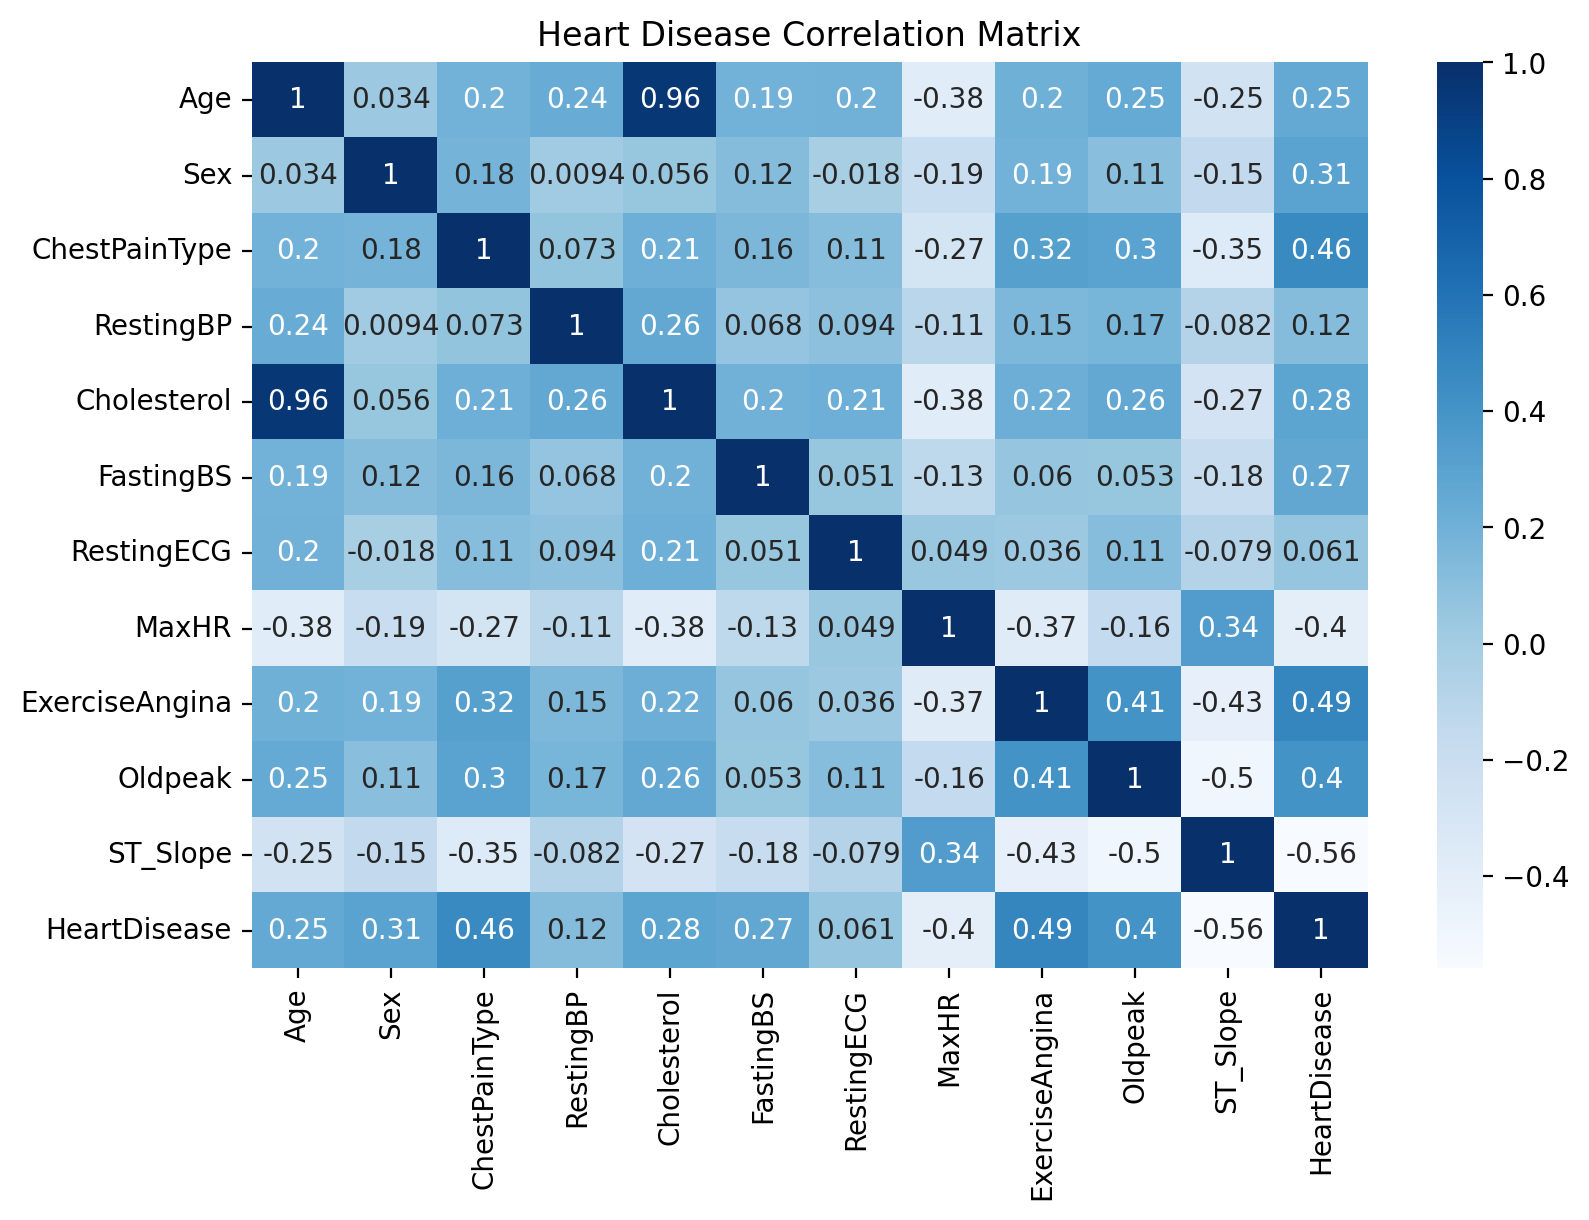

In [ ]:
plt.figure(figsize=(9,6),dpi=200)
plt.title("Heart Disease Correlation Matrix", c="black")
sns.heatmap(df.corr(), cmap="Blues", annot=True)

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Index,,,,,,,,,,,,
0,3,1,0,140.0,40,0,0,172,0,0.0,2,0
1,4,0,1,160.0,49,0,0,156,0,1.0,1,1
2,3,1,0,130.0,37,0,1,98,0,0.0,2,0
3,4,0,2,138.0,48,0,0,108,1,1.5,1,1
4,5,1,1,150.0,54,0,0,122,0,0.0,2,0


In [ ]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
predictors=df.drop(["HeartDisease"],axis=1)
target=df["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.20, random_state=41)

In [ ]:
#Train and Test Set
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)

sgd.score(X_test, y_test)

acc_sgd = round(sgd.score(X_test, y_test) * 100, 2)
acc_sgd

53.8

In [ ]:
# Train ve Test veri setleri ile ayırarak daha mantıklı bir score elde ediliyor

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

random_forest.score(X_test, y_test)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)

acc_random_forest

85.87

In [ ]:
#Train and Test Set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

acc_log = round(logreg.score(X_test, y_test) * 100, 2)
acc_log

82.61

In [ ]:
#Train and Test Set
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

acc_knn = round(knn.score(X_test,y_test) * 100, 2)
acc_knn


66.85

In [ ]:
#Train and Test Set
gaussian = GaussianNB()
gaussian.fit(X_train, y_train) 

acc_gaussian = round(gaussian.score(X_test,y_test) * 100, 2)
acc_gaussian

83.7

In [ ]:
#Train and Test Set
perceptron = Perceptron(max_iter=200)
perceptron.fit(X_train, y_train) 

acc_perceptron = round(perceptron.score(X_test,y_test) * 100, 2)

acc_perceptron 

58.7

In [ ]:
#Train and Test Set
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train) 

acc_linear_svc = round(linear_svc.score(X_test,y_test) * 100, 2)
acc_linear_svc 

82.07

In [ ]:
#Train and Test Set
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train) 
 
acc_decision_tree = round(decision_tree.score(X_test,y_test) * 100, 2)
acc_decision_tree

77.72

In [ ]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
85.87,Random Forest
83.70,Naive Bayes
82.61,Logistic Regression
82.07,Support Vector Machines
77.72,Decision Tree
66.85,KNN
58.70,Perceptron
53.80,Stochastic Gradient Decent


In [ ]:
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, predictors, target, cv=5, scoring='accuracy')
print(scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

[0.9076087  0.83152174 0.83152174 0.83606557 0.75956284]
Mean: 0.833256117842718
Standard Deviation: 0.04684637442161582


In [ ]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, predictors, target, cv=5, scoring='recall')
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.89215686 0.79411765 0.98039216 0.91089109 0.76237624]
Mean: 0.8679867986798679
Standard Deviation: 0.07958665321541816


In [ ]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, predictors, target, cv=5, scoring='precision')
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.92929293 0.90804598 0.76744186 0.82727273 0.8       ]
Mean: 0.8464106988084534
Standard Deviation: 0.06232922909347647


In [ ]:
importances = pd.DataFrame({'Feature':predictors.columns,'Importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Feature')
importances.head(15)

,Importance
Feature,
ST_Slope,0.239
MaxHR,0.126
ExerciseAngina,0.124
Oldpeak,0.110
ChestPainType,0.104
Cholesterol,0.093
RestingBP,0.083
FastingBS,0.032
RestingECG,0.032


Text(0, 0.5, 'Feature')

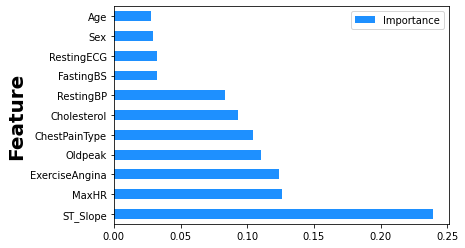

In [ ]:
importances.plot.barh(stacked=True,color="dodgerblue")
plt.ylabel("Feature",fontweight="bold",fontsize=20)


In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(predictors, target)
Y_prediction = random_forest.predict(X_test)

random_forest.score(predictors, target)

acc_random_forest = round(random_forest.score(predictors, target) * 100, 2)
print(round(acc_random_forest,2,), "%")

100.0 %


In [ ]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")


oob score: 85.28999999999999 %


In [ ]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5], "min_samples_split" : [2, 4], "n_estimators": [100, 400]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(predictors, target)
clf.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [ ]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "entropy", 
                                       min_samples_leaf = 5, 
                                       min_samples_split = 2,   
                                       n_estimators=400, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(predictors, target)
Y_prediction = random_forest.predict(X_test)

random_forest.score(predictors, target)

acc_random_forest = round(random_forest.score(predictors, target) * 100, 2)
print(round(acc_random_forest,2,), "%")
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

91.72 %
oob score: 86.06 %


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, predictors, target, cv=3)
confusion_matrix(target, predictions)

array([[309, 101],
       [ 59, 449]])

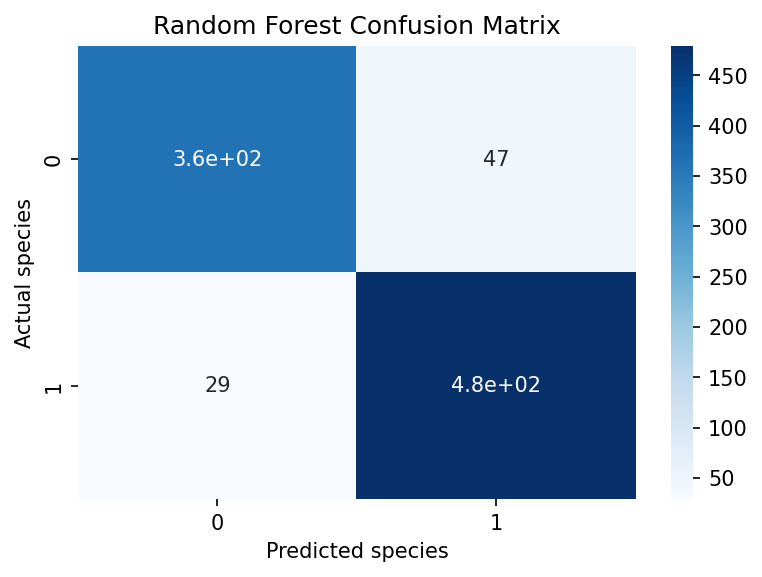

In [ ]:
# Print confusion matrix for random forest
rf_confusion = confusion_matrix(target, random_forest.predict(predictors))
plt.figure(dpi=150)
sns.heatmap(rf_confusion, cmap=plt.cm.Blues, annot=True)
plt.xlabel('Predicted species')
plt.ylabel('Actual species')
plt.title('Random Forest Confusion Matrix');

In [ ]:
from sklearn.metrics import classification_report


print(classification_report(target, predictions))


              precision    recall  f1-score   support

           0       0.84      0.75      0.79       410
           1       0.82      0.88      0.85       508

    accuracy                           0.83       918
   macro avg       0.83      0.82      0.82       918
weighted avg       0.83      0.83      0.82       918



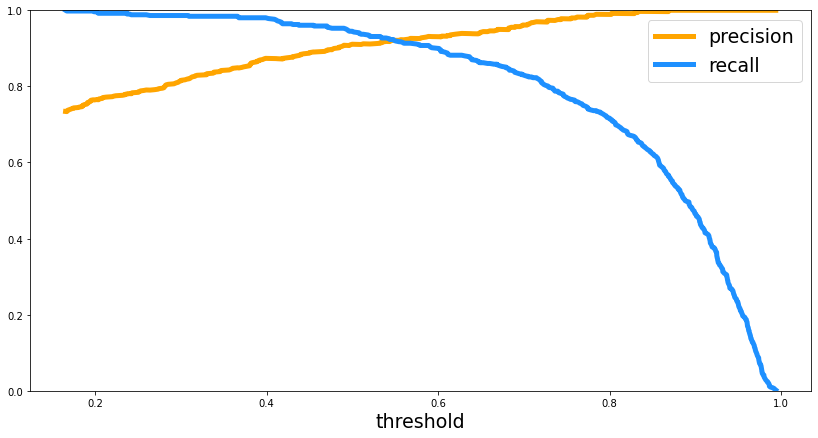

In [ ]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(predictors)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(target, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "orange", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "dodgerblue", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

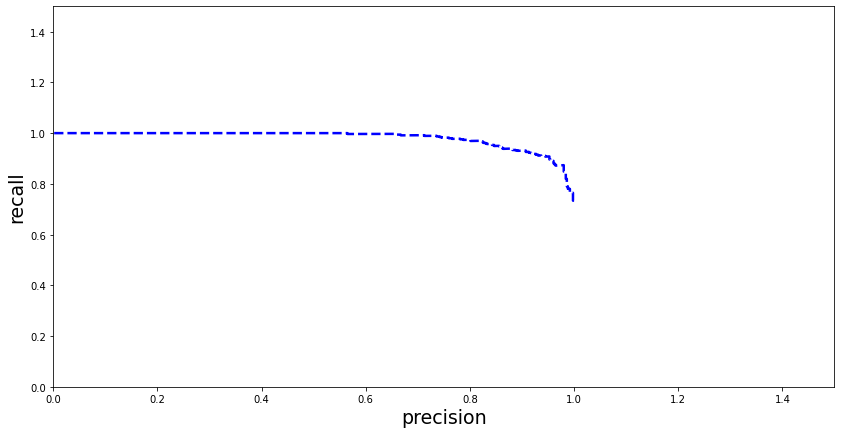

In [ ]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "b--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

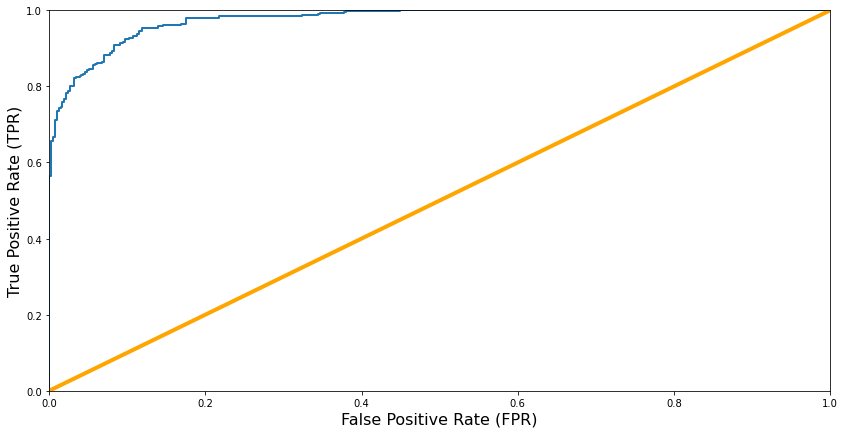

In [ ]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(target, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'orange', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(target, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9758546187824083
